In [112]:
# 예제
#1.test_csv 폴더에 있는 '유통+업종(백화점,할인점,슈퍼마켓,편의점)+카드소비트렌드+데이터_1901)2109'파일 로드
#2.각 컬럼의 이름을 ['기준연월','업종','성별','연령대','총이용건수','총이용금액']
#3.기준연월을 시계열데이터로 변경
#4.성별 컬럼의 데이터를 1=남자, 2=여자, 9=무관으로 변경
#5.남,녀 성별을 기준으로 연도별 건당 이용금액의 평균을 출력

In [113]:
import pandas as pd

In [114]:
file = pd.read_csv("./test_csv/유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109.csv", encoding="euc-kr")
file.head()

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7600.000000
1,201901,백화점,1,10,379,19458720.000000
2,201901,백화점,1,20,45173,4747711001.000000
3,201901,백화점,1,30,271858,27918261543.000000
4,201901,백화점,1,40,391109,37911486656.000000


In [115]:
file.columns=['기준연월','업종','성별','연령대','총이용건수','총이용금액']

In [116]:
# pandas에서 지수 표현 없애기
pd.options.display.float_format = '{:2f}'.format

In [117]:
file.head()

,기준연월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7600.000000
1,201901,백화점,1,10,379,19458720.000000
2,201901,백화점,1,20,45173,4747711001.000000
3,201901,백화점,1,30,271858,27918261543.000000
4,201901,백화점,1,40,391109,37911486656.000000


In [118]:
# file["기준연월"] = file["기준연월"].dt.strftime("%Y-%m")
file["기준연월"] = pd.to_datetime(file["기준연월"], format="%Y%m")
file.head()

,기준연월,업종,성별,연령대,총이용건수,총이용금액
0,2019-01-01,백화점,1,1,1,7600.000000
1,2019-01-01,백화점,1,10,379,19458720.000000
2,2019-01-01,백화점,1,20,45173,4747711001.000000
3,2019-01-01,백화점,1,30,271858,27918261543.000000
4,2019-01-01,백화점,1,40,391109,37911486656.000000


In [119]:
# 기준연월을 인덱스로 설정
file.set_index("기준연월", inplace=True)

In [120]:
file["성별"] = file["성별"].apply(lambda x:"남자" if(x==1) else ("여자" if(x==2) else "무관"))
file.head()


# file["성별"] = file["성별"].replace({
#                                     1:"남자",
#                                     2:"여자",
#                                     9:"무관"
#                                 })

,업종,성별,연령대,총이용건수,총이용금액
기준연월,,,,,
2019-01-01,백화점,남자,1,1,7600.000000
2019-01-01,백화점,남자,10,379,19458720.000000
2019-01-01,백화점,남자,20,45173,4747711001.000000
2019-01-01,백화점,남자,30,271858,27918261543.000000
2019-01-01,백화점,남자,40,391109,37911486656.000000


In [121]:
file["성별"].value_counts()

여자    1336
남자    1312
Name: 성별, dtype: int64

In [122]:
# 기준년 파생변수 생성
file["기준년도"] = file.index.strftime("%Y")

In [123]:
# 건당 이용금액 파생변수 생성
file["건당이용금액"] = file["총이용금액"] / file["총이용건수"]

In [124]:
file.head()

,업종,성별,연령대,총이용건수,총이용금액,기준년도,건당이용금액
기준연월,,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019,7600.000000
2019-01-01,백화점,남자,10,379,19458720.000000,2019,51342.269129
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019,105100.635357
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019,102694.279892
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019,96933.301601


In [125]:
file[["기준년도","성별","건당이용금액"]].groupby(["기준년도","성별"]).mean()

건당이용금액
기준년도 성별             
2019 남자 39184.349662
     여자 38107.838544
2020 남자 44009.589591
     여자 41389.763130
2021 남자 46948.320084
     여자 43306.318972

In [126]:
# 성별,년도별 건당 이용금액
file[["기준년도","성별","건당이용금액"]].groupby(["기준년도","성별"]).mean()

건당이용금액
기준년도 성별             
2019 남자 39184.349662
     여자 38107.838544
2020 남자 44009.589591
     여자 41389.763130
2021 남자 46948.320084
     여자 43306.318972

<AxesSubplot:xlabel='기준년도,성별'>

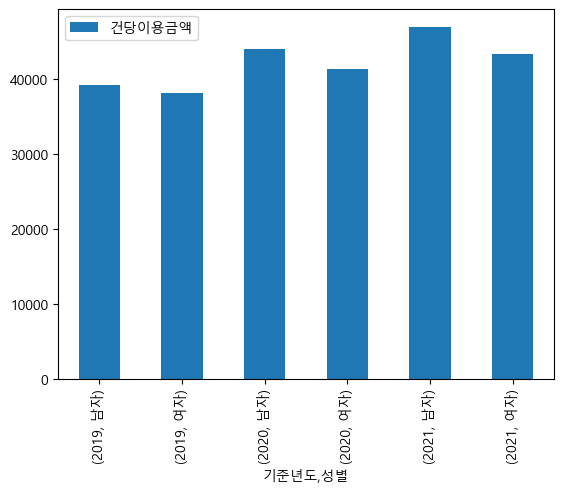

In [127]:
# 그래프 한글 깨짐 방지 -> platform 라이브러리(기본 내장) 사용
import platform
import matplotlib.pyplot as plt

if platform.system() == "Darwin":   # mac os 사용하는 경우
    plt.rc("font", family="AppleGothic")
else:
    plt.rc("font", family="Malgun Gothic")

(file[["기준년도","성별","건당이용금액"]].groupby(["기준년도","성별"]).mean()).plot.bar()

In [128]:
pivot = pd.pivot_table(
    file,
    index="기준년도",
    columns="성별",
    aggfunc="mean",
    values="건당이용금액"
)

pivot

성별,남자,여자
기준년도,,
2019,39184.349662,38107.838544
2020,44009.589591,41389.763130
2021,46948.320084,43306.318972


<AxesSubplot:xlabel='기준년도'>

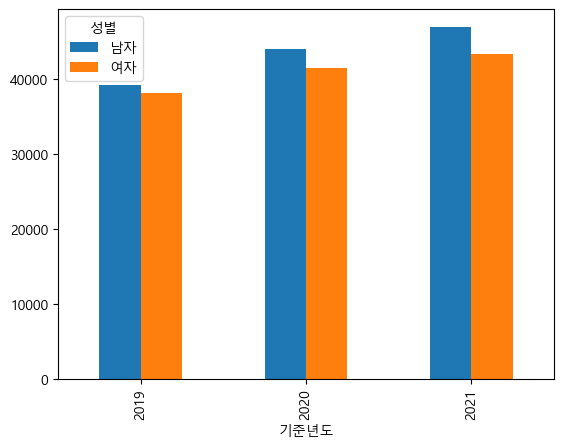

In [129]:
pivot.plot.bar()

In [130]:
## 온라인 카드 매출과 오프라인 카드 매출을 월별로 비교
#1.오프라인 데이터 file을 월별로 그룹화해 총이용금액의 합계 추출
#   ->인덱스는 시계열 데이터(기준연월)로 설정
#2.온라인 데이터 df_online도 월별로 그룹화해 총이용금액의 합계 추출
#   ->인덱스는 시계열 데이터(기준연월)로 설정

In [131]:
file.index

DatetimeIndex(['2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-01-01', '2019-01-01', '2019-01-01',
               '2019-01-01', '2019-01-01',
               ...
               '2021-09-01', '2021-09-01', '2021-09-01', '2021-09-01',
               '2021-09-01', '2021-09-01', '2021-09-01', '2021-09-01',
               '2021-09-01', '2021-09-01'],
              dtype='datetime64[ns]', name='기준연월', length=2648, freq=None)

In [132]:
# file.groupby('기준연월').sum()
group_data1 = file.groupby(file.index).sum()["총이용금액"]
group_data1

C:\Users\umjiwoo\AppData\Local\Temp\ipykernel_5084\1216676853.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data1 = file.groupby(file.index).sum()["총이용금액"]


기준연월
2019-01-01   871763992837.000000
2019-02-01   775597878513.000000
2019-03-01   902760336419.000000
2019-04-01   885040315354.000000
2019-05-01   942795259940.000000
2019-06-01   865118271269.000000
2019-07-01   875762202774.000000
2019-08-01   850400279668.000000
2019-09-01   924355032170.000000
2019-10-01   930584602858.000000
2019-11-01   949787921255.000000
2019-12-01   978839715787.000000
2020-01-01   898878443957.000000
2020-02-01   708144204269.000000
2020-03-01   723244937660.000000
2020-04-01   788469680394.000000
2020-05-01   867150222055.000000
2020-06-01   847683179271.000000
2020-07-01   795882370053.000000
2020-08-01   842156674669.000000
2020-09-01   863819162763.000000
2020-10-01   907538057907.000000
2020-11-01   915551971958.000000
2020-12-01   803224236182.000000
2021-01-01   809119993998.000000
2021-02-01   769880767492.000000
2021-03-01   874738936411.000000
2021-04-01   840326880987.000000
2021-05-01   916953047537.000000
2021-06-01   816867327905.000000
2021-

In [133]:
df_online = pd.read_csv("./test_csv/온라인+카드소비트렌드+데이터_1901_2109.csv")
df_online.head()

,crym,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,20,272915,13854081656
3,201901,1,30,1320227,82946127640
4,201901,1,40,1372052,95550848337


In [134]:
# 컬럼 이름 변경
df_online.columns = ["기준연월","성별","연령대","총이용건수","총이용금액"]

In [135]:
df_online.head()

,기준연월,성별,연령대,총이용건수,총이용금액
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,20,272915,13854081656
3,201901,1,30,1320227,82946127640
4,201901,1,40,1372052,95550848337


In [136]:
df_online["기준연월"] = pd.to_datetime(df_online["기준연월"], format="%Y%m")

In [137]:
df_online.set_index("기준연월", inplace=True)

In [138]:
df_online

,성별,연령대,총이용건수,총이용금액
기준연월,,,,
2019-01-01,1,1,1,110685
2019-01-01,1,10,2333,98108225
2019-01-01,1,20,272915,13854081656
2019-01-01,1,30,1320227,82946127640
2019-01-01,1,40,1372052,95550848337
...,...,...,...,...
2021-09-01,2,50,3237324,181360535814
2021-09-01,2,60,1019719,70026626874
2021-09-01,2,70,159261,13091029631


In [139]:
# 인덱스인 기준연월을 기준으로 같은 값을 갖는 행끼리의 합계를 구하고 해당 데이터에서 각각의 총이용금액을 추출
group_data2 = df_online.groupby('기준연월').sum()["총이용금액"]
group_data2

기준연월
2019-01-01     778281658966
2019-02-01     669627559900
2019-03-01     769982635445
2019-04-01     769343707461
2019-05-01     785876486705
2019-06-01     736634786418
2019-07-01     789419422650
2019-08-01     773942892864
2019-09-01     789228722869
2019-10-01     845586167863
2019-11-01     882579790957
2019-12-01     910066757909
2020-01-01     899703509382
2020-02-01     912763625832
2020-03-01     965611011227
2020-04-01     931307970792
2020-05-01     950802396484
2020-06-01     995605134056
2020-07-01    1017431624983
2020-08-01    1009749120540
2020-09-01    1060918790262
2020-10-01    1031688353884
2020-11-01    1069901508390
2020-12-01    1161292914339
2021-01-01    1148184458420
2021-02-01    1061306176199
2021-03-01    1196784931389
2021-04-01    1185710549372
2021-05-01    1205281302978
2021-06-01    1193365244882
2021-07-01    1217713253921
2021-08-01    1254467251455
2021-09-01    1195275255905
Name: 총이용금액, dtype: int64

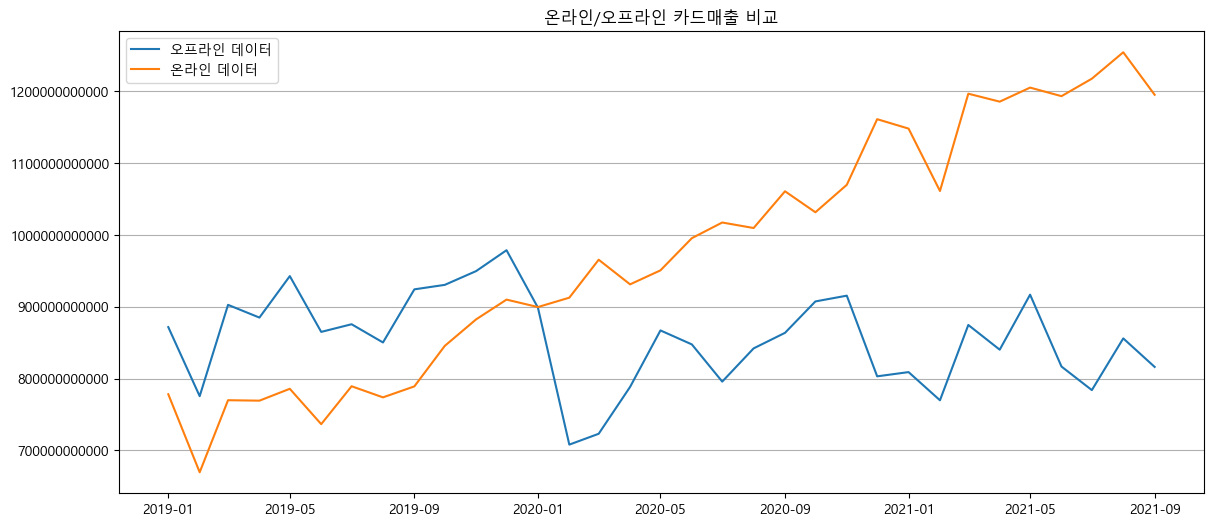

In [140]:
plt.figure(figsize=(14,6))

plt.grid(True, axis='y')

plt.ticklabel_format(axis='y', style='plain')

plt.plot(group_data1,label="오프라인 데이터")
plt.plot(group_data2,label="온라인 데이터")
plt.title("온라인/오프라인 카드매출 비교")
plt.legend()
plt.show()

In [141]:
file

,업종,성별,연령대,총이용건수,총이용금액,기준년도,건당이용금액
기준연월,,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019,7600.000000
2019-01-01,백화점,남자,10,379,19458720.000000,2019,51342.269129
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019,105100.635357
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019,102694.279892
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019,96933.301601
...,...,...,...,...,...,...,...
2021-09-01,편의점,여자,50,844081,6283353303.000000,2021,7444.016988
2021-09-01,편의점,여자,60,243768,1997441975.000000,2021,8194.028646
2021-09-01,편의점,여자,70,40523,352420260.000000,2021,8696.795894


In [142]:
df_online["업종"]="온라인"

In [143]:
df_online

,성별,연령대,총이용건수,총이용금액,업종
기준연월,,,,,
2019-01-01,1,1,1,110685,온라인
2019-01-01,1,10,2333,98108225,온라인
2019-01-01,1,20,272915,13854081656,온라인
2019-01-01,1,30,1320227,82946127640,온라인
2019-01-01,1,40,1372052,95550848337,온라인
...,...,...,...,...,...
2021-09-01,2,50,3237324,181360535814,온라인
2021-09-01,2,60,1019719,70026626874,온라인
2021-09-01,2,70,159261,13091029631,온라인


In [144]:
df_on_off = pd.concat([file,df_online],axis="rows")

In [145]:
df_online

,성별,연령대,총이용건수,총이용금액,업종
기준연월,,,,,
2019-01-01,1,1,1,110685,온라인
2019-01-01,1,10,2333,98108225,온라인
2019-01-01,1,20,272915,13854081656,온라인
2019-01-01,1,30,1320227,82946127640,온라인
2019-01-01,1,40,1372052,95550848337,온라인
...,...,...,...,...,...
2021-09-01,2,50,3237324,181360535814,온라인
2021-09-01,2,60,1019719,70026626874,온라인
2021-09-01,2,70,159261,13091029631,온라인


In [146]:
df_on_off

,업종,성별,연령대,총이용건수,총이용금액,기준년도,건당이용금액
기준연월,,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019,7600.000000
2019-01-01,백화점,남자,10,379,19458720.000000,2019,51342.269129
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019,105100.635357
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019,102694.279892
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019,96933.301601
...,...,...,...,...,...,...,...
2021-09-01,온라인,2,50,3237324,181360535814.000000,NaN,NaN
2021-09-01,온라인,2,60,1019719,70026626874.000000,NaN,NaN
2021-09-01,온라인,2,70,159261,13091029631.000000,NaN,NaN
